## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Business Goal
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Step 1. Read and Understand data

In [1]:
# Supressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline


# setting options to display max number of rows and columns

pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',250)

In [3]:
# Reading data.csv file, and viewing the top rows

df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# check the shape

df.shape

(99999, 226)

In [5]:
# basic information


df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# get the numerical info

df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Step 2. Data Cleaning

### Handling High percentage missing  values

In [7]:
# fetching columns with more than 70% missing values

temp = round(100*(df.isnull().sum()/len(df.index)), 2)
temp[temp >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [8]:
# removing all these data since they have missing value %ge greater 70%

df = df[df.columns[df.isnull().mean() < 0.7]]
df.shape

(99999, 186)

In [9]:
# calculating mean for the missing value columns

df.isna().mean().round(4) * 100

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

###  Imputing columns with 'zero' values

In [10]:
# if total_rech_amt is 0, get the avg amt per recharge, and multiply with total_rech_num respectively.

amt_cols= ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']
df_amt = df[amt_cols]
df_amt = df_amt.fillna(0)
df_amt

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9
0,4,3,2,6,362,252,252,0
1,4,9,11,5,74,384,283,121
2,5,4,2,7,168,315,116,358
3,10,11,18,14,230,310,601,410
4,5,6,3,4,196,350,287,200
...,...,...,...,...,...,...,...,...
99994,2,3,2,2,60,110,0,50
99995,5,3,2,1,110,110,182,30
99996,5,2,0,1,119,0,0,0
99997,3,4,4,6,381,358,716,862


In [11]:
# creating functions to impute values for amount and number columns

def get_avg_amt(x):
    #     function returns average amount of recharge per customer
    avg_amt = int(round((x['total_rech_amt_6']+ x['total_rech_amt_7']+x['total_rech_amt_8']+ x['total_rech_amt_9'])//
                          (x['total_rech_num_6']+ x['total_rech_num_7']+x['total_rech_num_8']+ x['total_rech_num_9'])
                       ))
    return avg_amt

def if_any_column_is_zero(x):
    #     funxtion returns True if any of the column value is 0 else False
    if (x['total_rech_num_6'] ==0 or x['total_rech_num_7'] ==0 or 
                                                            x['total_rech_num_8'] ==0 or x['total_rech_num_9'] ==0 or
                                                            x['total_rech_amt_6'] ==0 or x['total_rech_amt_7'] ==0 or
                                                            x['total_rech_amt_8'] ==0 or x['total_rech_amt_9']==0):
        return True
    else:
        return False

In [12]:
df_amt['avg_rech_amt'] = df_amt.apply(lambda x: int(get_avg_amt(x)) if if_any_column_is_zero(x) else 0 ,axis=1)

In [13]:
df_amt['avg_rech_amt'] = df_amt['avg_rech_amt'].astype('int64')


In [14]:
# average amount columns is being created with a mean value that will be used to impute the missing ones
df_amt

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,avg_rech_amt
0,4,3,2,6,362,252,252,0,57
1,4,9,11,5,74,384,283,121,0
2,5,4,2,7,168,315,116,358,0
3,10,11,18,14,230,310,601,410,0
4,5,6,3,4,196,350,287,200,0
...,...,...,...,...,...,...,...,...,...
99994,2,3,2,2,60,110,0,50,24
99995,5,3,2,1,110,110,182,30,0
99996,5,2,0,1,119,0,0,0,14
99997,3,4,4,6,381,358,716,862,0


In [15]:
# creating function to impute zero in 'total_rech_amt' columns

def impute_zeros(x):
    if (x['total_rech_num_6'] ==0 and x['total_rech_amt_6'] !=0):
        x['total_rech_num_6'] = round((x['total_rech_amt_6'])//(x['avg_rech_amt']))
    elif (x['total_rech_num_6'] !=0 and x['total_rech_amt_6'] ==0):
        x['total_rech_amt_6'] = round((x['total_rech_num_6'])*(x['avg_rech_amt']))
    elif (x['total_rech_num_7'] ==0 and x['total_rech_amt_7'] !=0):
        x['total_rech_num_7'] = round((x['total_rech_amt_7'])//(x['avg_rech_amt']))
    elif (x['total_rech_num_7'] !=0 and x['total_rech_amt_7'] ==0):
        x['total_rech_amt_7'] = round((x['total_rech_num_7'])*(x['avg_rech_amt']))
    elif (x['total_rech_num_8'] ==0 and x['total_rech_amt_8'] !=0):
        x['total_rech_num_8'] = round((x['total_rech_amt_8'])//(x['avg_rech_amt']))
    elif (x['total_rech_num_8'] !=0 and x['total_rech_amt_8'] ==0):
        x['total_rech_amt_8'] = round((x['total_rech_num_8'])*(x['avg_rech_amt']))
    elif (x['total_rech_num_9'] ==0 and x['total_rech_amt_9'] !=0):
        x['total_rech_num_9'] = round((x['total_rech_amt_9'])//(x['avg_rech_amt']))
    elif (x['total_rech_num_9'] !=0 and x['total_rech_amt_9'] ==0):
        x['total_rech_amt_9'] = round((x['total_rech_num_9'])*(x['avg_rech_amt']))
    return x

In [16]:
# applying lambda function

df_amt = df_amt.apply(lambda x: impute_zeros(x) if if_any_column_is_zero(x) else x,axis=1)     

In [18]:
# assigning the recharge columns back to original dataset
df[amt_cols] = df_amt[amt_cols]

### Imputing categorical values

In [19]:
# calculating NULL value percentage again
# will use IterativeImputer with max_Iteration as 10

round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

In [20]:
# creating column category for each type

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8',
             'last_date_of_month_9', 'date_of_last_rech_6','date_of_last_rech_7',
             'date_of_last_rech_8','date_of_last_rech_9',
             ]

cat_cols =  [ 'monthly_2g_6' ,'monthly_2g_9' ,'monthly_2g_8' ,'monthly_2g_7' ,'monthly_3g_9' ,'monthly_3g_6' ,'monthly_3g_8' ,'monthly_3g_7' ,'sachet_3g_6' ,'sachet_3g_9' ,'sachet_3g_7' ,'sachet_3g_8' ,'sachet_2g_9' ,'sachet_2g_6' ,'sachet_2g_8' ,'sachet_2g_7']

num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]


In [22]:
 # convert date columns data type from object to date
    
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')
df[date_cols] = df[date_cols].apply(lambda x: x.fillna(x.mean()).dt.normalize())
df[date_cols]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-21,2014-07-16,2014-08-08,2014-09-28
1,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-29,2014-07-31,2014-08-28,2014-09-30
2,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-24,2014-08-14,2014-09-29
3,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-28,2014-07-31,2014-08-31,2014-09-30
4,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-26,2014-07-28,2014-08-09,2014-09-28
...,...,...,...,...,...,...,...,...
99994,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-03,2014-07-20,2014-08-26,2014-09-25
99995,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-17,2014-08-24,2014-09-26
99996,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-13,2014-07-26,2014-08-25,2014-09-02
99997,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-19,2014-08-20,2014-09-17


### Imputing with IterativeImputer for columns with lesser percentage of missing values

In [24]:
# fetching columns for those where mean is not zero

nan_cols = df.columns[df.isnull().mean() != 0]
nan_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=119)

In [25]:
# importing libraries for Iterative Imputer so as to impute value for columns containing lesser NULL %ge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

In [26]:
df[nan_cols] = pd.DataFrame(imp.fit_transform(df[nan_cols]))

In [27]:
# now we see all the columns are imputed with the values
nan_cols = df.columns[df.isnull().mean() > 0]
nan_cols

Index([], dtype='object')

In [28]:
# creating another copy that will be used further to avoid an expensive transformation as IterativeImputor
df_imp = df.copy()

## Step 3: Filtering High value customers

In [31]:
# calculate average for month 6 and 7

df_imp['avg_6_7'] = (df_imp.total_rech_amt_6 + df_imp.total_rech_amt_7)/2

In [32]:
# picking 70th percentile recharge amount

print(format(df_imp.avg_6_7.quantile(0.7)))

373.5


**As per the problem definition, we're supposed to retain only those customers who have recharged their mobiles with more than or equal to amount equivalent to 70th percentile amount**

### Creating 'churn' variable

In [33]:
# creating a new dataframe

churn_df = df_imp.loc[df_imp.avg_6_7 >= df_imp.avg_6_7.quantile(0.7), :]
churn_df = churn_df.reset_index(drop=True)
churn_df.shape

(30034, 187)

**Observation**: We are now left with 30034 rows and 187 columns. It was mentioned in the goal that we could possibly have around 29.9k rows.

In [34]:
churn_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_6_7'],
      dtype='object', length=187)

In [35]:
# calculate total incoming and outgoing minutes of usage

churn_df['total_calls_9'] = churn_df.total_ic_mou_9 + churn_df.total_og_mou_9
churn_df['total_internet_9'] =  churn_df.vol_2g_mb_9 + churn_df.vol_3g_mb_9

In [36]:
# 0 - not churn, 1 - churn

churn_df['churn'] = churn_df.apply(lambda row: 1 if (row.total_calls_9== 0 and row.total_internet_9 == 0) else 0, axis=1)

In [37]:
# print churn ratio

print(churn_df.churn.value_counts(normalize=True)*100)

0    91.189985
1     8.810015
Name: churn, dtype: float64


Text(0.5, 1.0, 'Churn Distribution Plot')

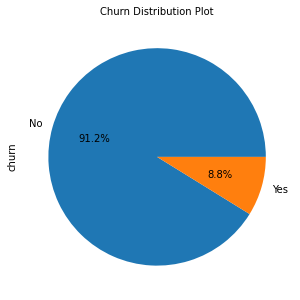

In [38]:
# Checking the churn distribution

axis = (churn_df['churn'].value_counts()*100.0 /len(churn_df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 10 )                                                                           
axis.set_ylabel('churn',fontsize = 10)
axis.set_title('Churn Distribution Plot', fontsize = 10)

In [39]:
# fetching the new dataframe again
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_6_7,total_calls_9,total_internet_9,churn
0,7000701601,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,127.527376,453.43,567.16,325.91,196.015808,16.23,33.49,31.64,23.770384,23.74,12.59,38.06,13.581032,51.39,31.38,40.28,44.585159,308.63,447.38,162.28,90.463485,62.13,55.14,53.23,3.655215,0.0,0.0,0.00,-0.339383,422.16,533.91,255.79,138.710595,4.30,23.29,12.01,82.339203,49.89,31.76,49.14,86.276548,6.66,20.08,16.68,1.042082,0.0,0.0,0.0,0.0,60.86,75.14,77.84,169.664079,0.0,0.18,10.01,3.803476,4.50,0.00,6.50,1.039662,0.00,0.0,0.0,-0.069378,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.279852,217.56,221.49,121.19,106.155276,152.16,101.46,39.53,12.173261,427.88,355.23,188.04,164.619125,36.89,11.83,30.39,9.426092,91.44,126.99,141.33,19.62093,52.19,34.24,22.21,2.173475,0.0,0.0,0.0,0.0,180.54,173.08,193.94,31.229286,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.09646,2.06,14.53,31.59,21.927141,15.74,15.19,15.14,8.660506,5,5,7,3,1580,790,3638,900,1580,790,1580,0,2014-06-27,2014-07-25,2014-08-26,2014-09-30,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,0.00,0.0,1
1,7001524846,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,20

## Step 4. Data Preparation

### Deriving new variables

In [42]:
# fetching columns to do data preparation
# as suggested selecting only June, July and August data

cols_678 = [column for column in churn_df.columns if '_9' not in column]
cols_678 = [l for l in cols_678 if l not in ['total_internet','total_calls','sep_vbc_3g','avg_6_7']]
cols_678

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_o

In [43]:
churn_678 = churn_df[cols_678]

In [44]:
# deriving new variable

churn_678['avg_arpu_678'] = (churn_678.arpu_6 + churn_678.arpu_7 + churn_678.arpu_8)/3
churn_678['avg_total_rech_amt_678'] = (churn_678.total_rech_amt_6 + churn_678.total_rech_amt_7 + churn_678.total_rech_amt_8)/3


### checking correlation between few meaningful columns and churn

<AxesSubplot:>

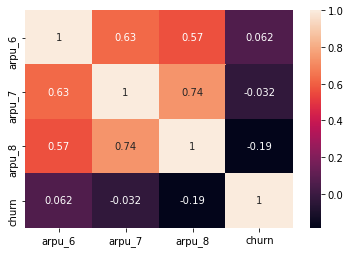

In [46]:
arpu_corr = churn_678[['arpu_6','arpu_7','arpu_8','churn']].corr()
sns.heatmap(arpu_corr,annot=True)

<AxesSubplot:>

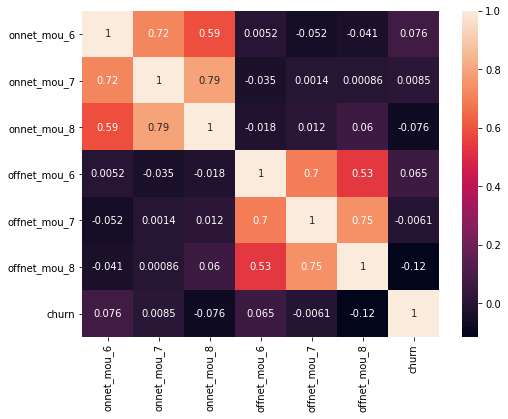

In [47]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[8,6])
all_call_corr = churn_678[['onnet_mou_6',
'onnet_mou_7',
'onnet_mou_8',
'offnet_mou_6',
'offnet_mou_7',
'offnet_mou_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)

<AxesSubplot:>

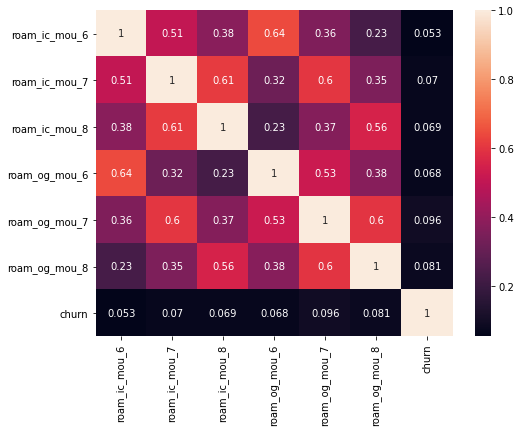

In [48]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[8,6])
all_call_corr = churn_678[['roam_ic_mou_6',
'roam_ic_mou_7',
'roam_ic_mou_8',
'roam_og_mou_6',
'roam_og_mou_7',
'roam_og_mou_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)



<AxesSubplot:>

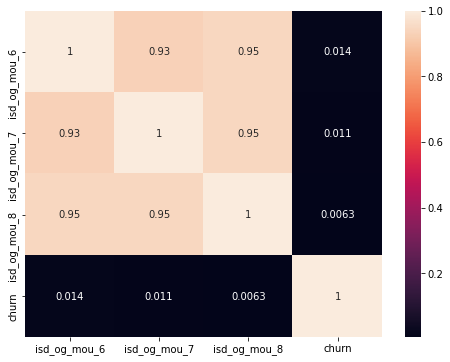

In [49]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[8,6])
all_call_corr = churn_678[['isd_og_mou_6',
'isd_og_mou_7',
'isd_og_mou_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)

<AxesSubplot:>

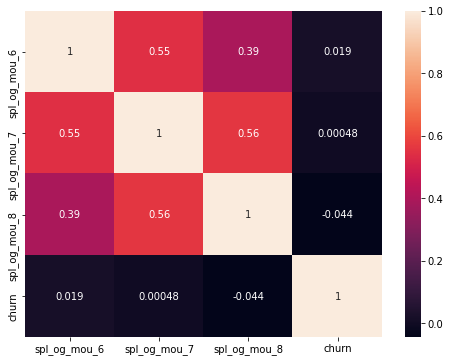

In [50]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[8,6])
all_call_corr = churn_678[['spl_og_mou_6',
'spl_og_mou_7',
'spl_og_mou_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)

<AxesSubplot:>

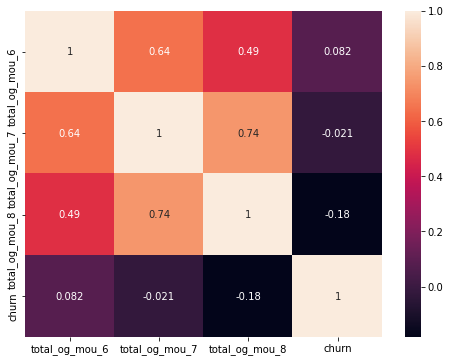

In [51]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[8,6])
all_call_corr = churn_678[['total_og_mou_6',
'total_og_mou_7',
'total_og_mou_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)

<AxesSubplot:>

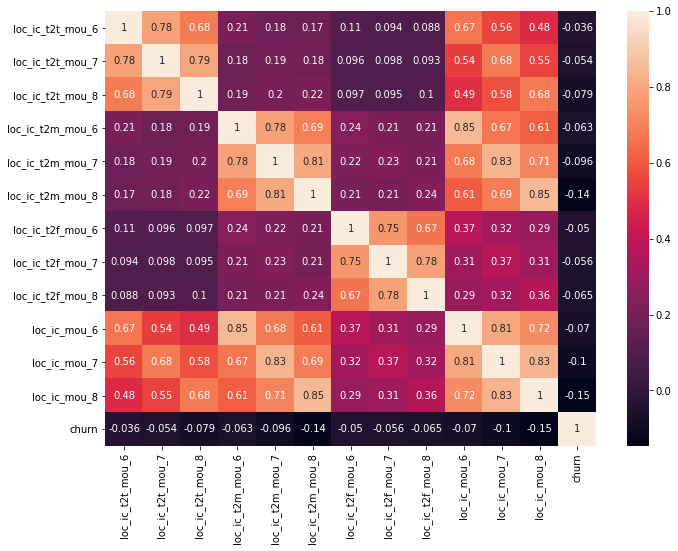

In [52]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[11,8])
all_call_corr = churn_678[['loc_ic_t2t_mou_6',
'loc_ic_t2t_mou_7',
'loc_ic_t2t_mou_8',
'loc_ic_t2m_mou_6',
'loc_ic_t2m_mou_7',
'loc_ic_t2m_mou_8',
'loc_ic_t2f_mou_6',
'loc_ic_t2f_mou_7',
'loc_ic_t2f_mou_8',
'loc_ic_mou_6',
'loc_ic_mou_7',
'loc_ic_mou_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)



<AxesSubplot:>

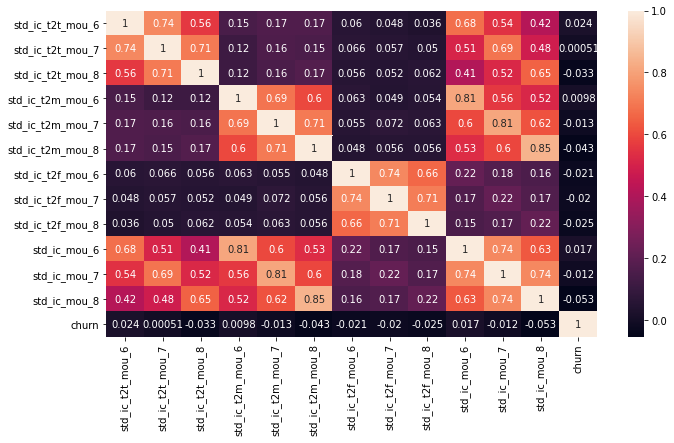

In [53]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[11,6])
all_call_corr = churn_678[['std_ic_t2t_mou_6',
'std_ic_t2t_mou_7',
'std_ic_t2t_mou_8',
'std_ic_t2m_mou_6',
'std_ic_t2m_mou_7',
'std_ic_t2m_mou_8',
'std_ic_t2f_mou_6',
'std_ic_t2f_mou_7',
'std_ic_t2f_mou_8',
'std_ic_mou_6',
'std_ic_mou_7',
'std_ic_mou_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)





<AxesSubplot:>

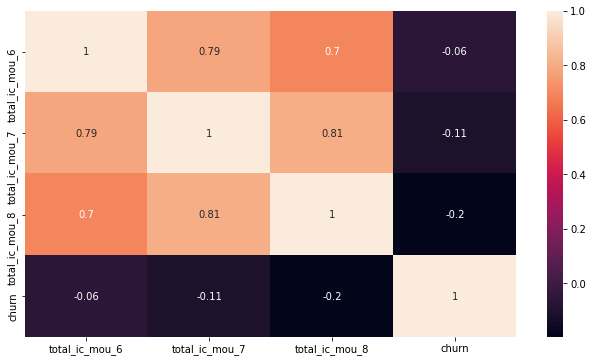

In [54]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[11,6])
all_call_corr = churn_678[['total_ic_mou_6',
'total_ic_mou_7',
'total_ic_mou_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)

<AxesSubplot:>

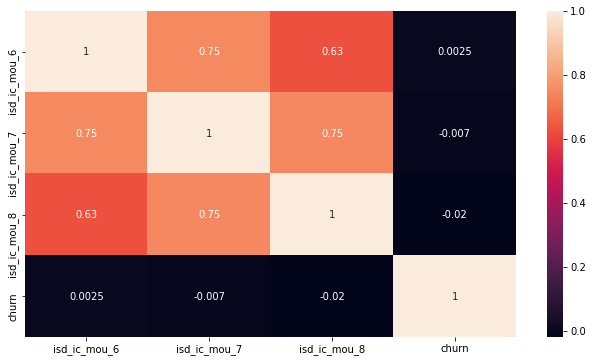

In [55]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[11,6])
all_call_corr = churn_678[['isd_ic_mou_6',
'isd_ic_mou_7',
'isd_ic_mou_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)

<AxesSubplot:>

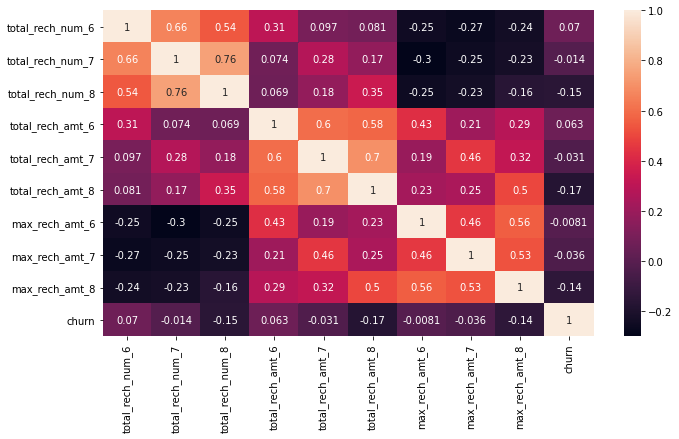

In [56]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[11,6])
all_call_corr = churn_678[['total_rech_num_6',
'total_rech_num_7',
'total_rech_num_8',
'total_rech_amt_6',
'total_rech_amt_7',
'total_rech_amt_8',
'max_rech_amt_6',
'max_rech_amt_7',
'max_rech_amt_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)

<AxesSubplot:>

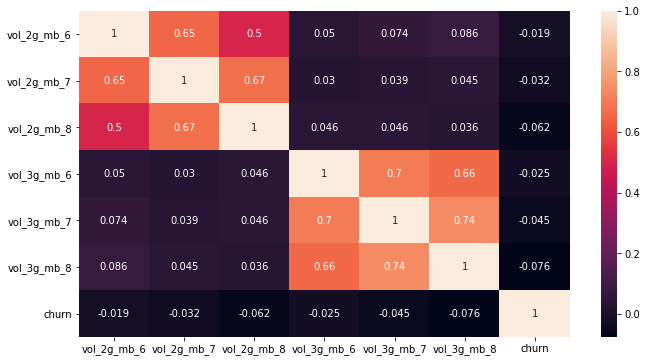

In [57]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[11,6])
all_call_corr = churn_678[['vol_2g_mb_6',
'vol_2g_mb_7',
'vol_2g_mb_8',
'vol_3g_mb_6',
'vol_3g_mb_7',
'vol_3g_mb_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)

<AxesSubplot:>

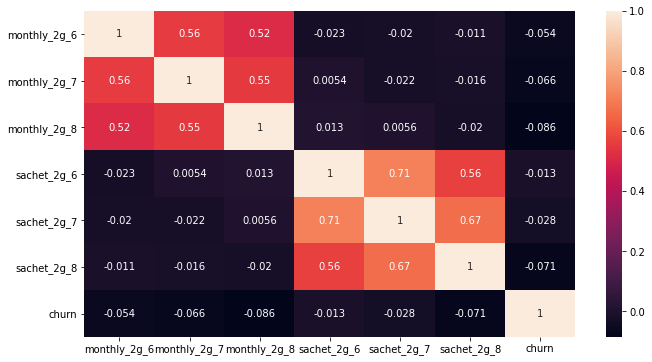

In [58]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[11,6])
all_call_corr = churn_678[['monthly_2g_6',
'monthly_2g_7',
'monthly_2g_8',
'sachet_2g_6',
'sachet_2g_7',
'sachet_2g_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)

<AxesSubplot:>

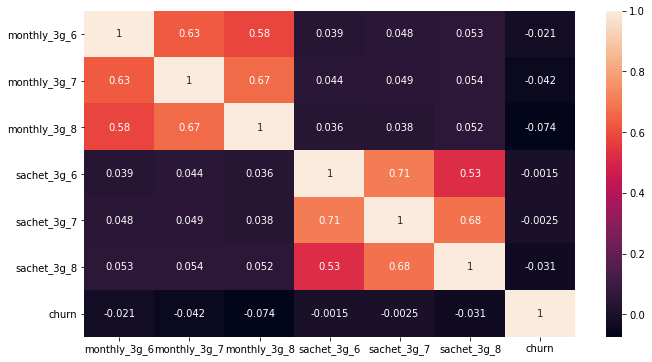

In [59]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[11,6])
all_call_corr = churn_678[['monthly_3g_6',
'monthly_3g_7',
'monthly_3g_8',
'sachet_3g_6',
'sachet_3g_7',
'sachet_3g_8',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)

<AxesSubplot:>

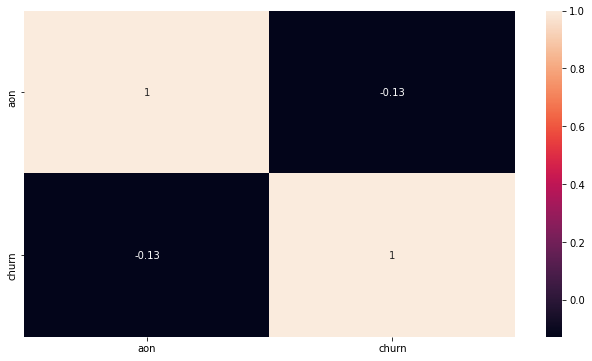

In [60]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[11,6])
all_call_corr = churn_678[['aon','churn']].corr()
sns.heatmap(all_call_corr,annot=True)

<AxesSubplot:>

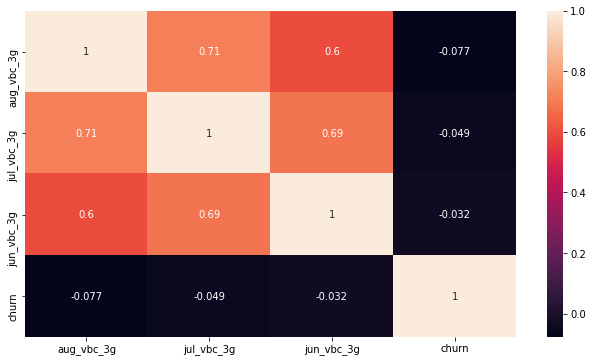

In [61]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[11,6])
all_call_corr = churn_678[['aug_vbc_3g',
'jul_vbc_3g',
'jun_vbc_3g',
'churn']].corr()
sns.heatmap(all_call_corr,annot=True)


In [62]:
# creating avg for the month 6,7,8

churn_678['avg_total_calls_678'] = (churn_678.total_ic_mou_6 + churn_678.total_og_mou_6 + \
                            churn_678.total_ic_mou_7 + churn_678.total_og_mou_7 + \
                            churn_678.total_ic_mou_8 + churn_678.total_og_mou_8) /6
        
churn_678['avg_total_internet_678'] =  (churn_678.vol_2g_mb_6 + churn_678.vol_3g_mb_6 + \
                                   churn_678.vol_2g_mb_7 + churn_678.vol_3g_mb_7 + \
                                  churn_678.vol_2g_mb_8 + churn_678.vol_3g_mb_8)/6


<AxesSubplot:>

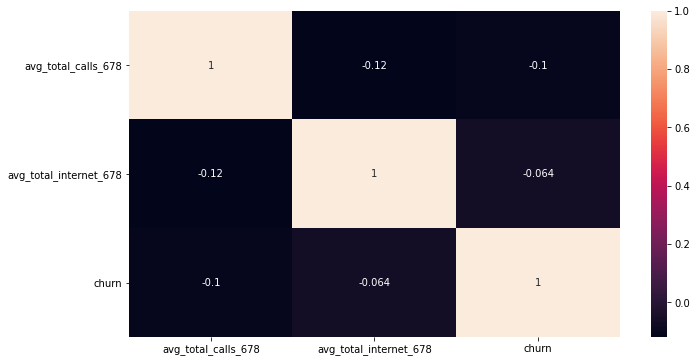

In [63]:
# Creating heatmap for few columns to check correlation b/w these variables

plt.figure(figsize=[11,6])
all_call_corr = churn_678[['avg_total_calls_678',
'avg_total_internet_678','churn']].corr()
sns.heatmap(all_call_corr,annot=True)


**Very few columns do make sense to be used in the modeling,
like below avg_total_internet_678 are derived columns and show a good negative correlation with churn**
 - tenure of customer(aon)
 - aug_vbc_3g
 - avg_total_calls_678
 - monthly_3g_8

## Exploratory Data Analysis

### Univariate Analysis

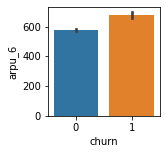

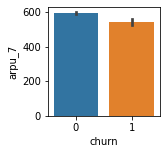

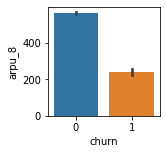

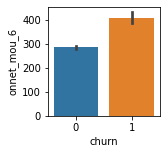

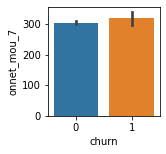

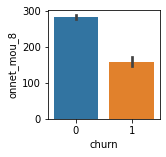

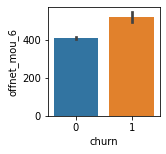

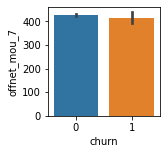

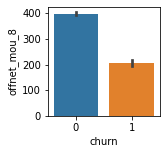

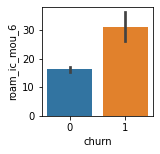

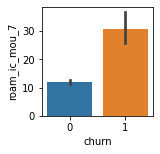

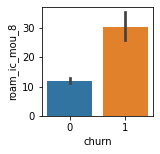

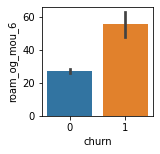

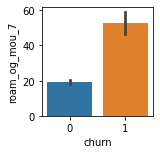

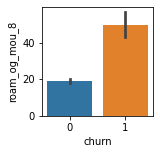

In [65]:
# Bar plot for churn vs other features
# correlation of Churn with other Features


col1 = ['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8'
        ,'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8', 'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']

cont_cols = [col for col in col1 if col not in ['churn','mobile_number']]
for x in cont_cols:
    plt.figure(figsize=(2, 2))
    sns.barplot(x='churn', y=x, data=churn_678)
    plt.show()

### roam_ic_mou, onnet and offnet columns are showing a good variance in churning a customer

Text(0.5, 0, 'total internet')

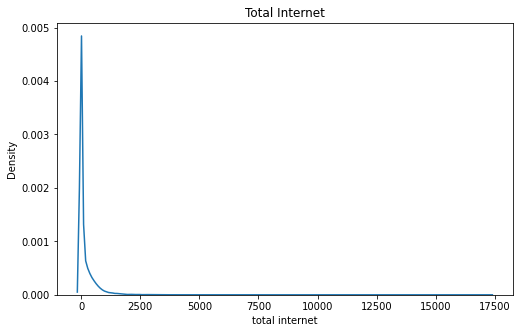

In [80]:
# dist plot for column avg_total_internet_678

plt.figure(figsize=[18,11])
plt.subplot(2,2,1)
plt.title("Total Internet")
sns.distplot(churn_678.avg_total_internet_678,hist=False)
plt.xlabel('total internet')

# We see a right tail data 

Text(0.5, 0, 'avg total calls')

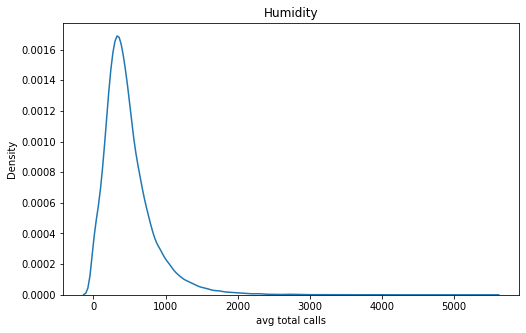

In [67]:
# dist plot for column for avg calls

plt.figure(figsize=[18,11])
plt.subplot(2,2,1)
plt.title("Humidity")
sns.distplot(churn_678.avg_total_calls_678,hist=False)
plt.xlabel('avg total calls')

# data is not equally distributed, that can be fixed using any of the 
# transformation methods such as BOX-COX Transformation or log

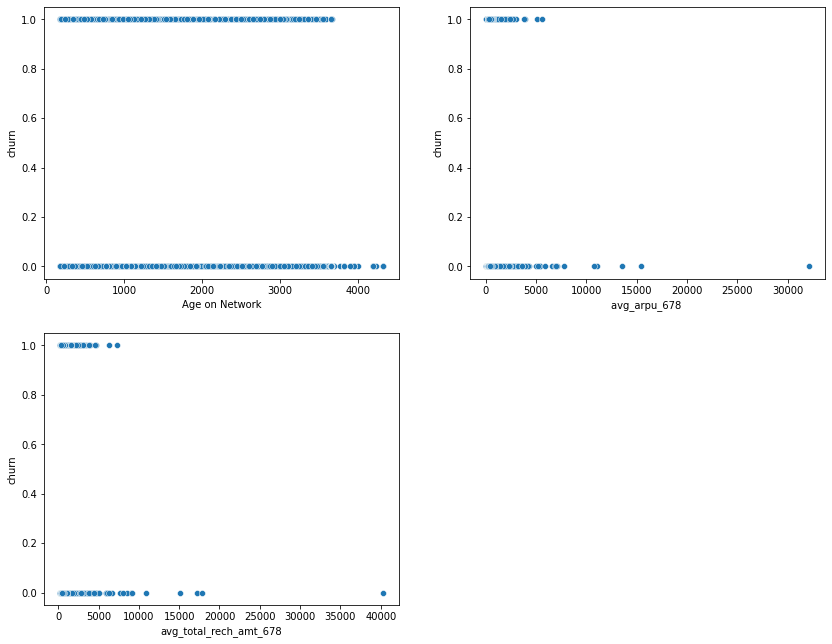

In [81]:
# creating scatter plot using derived variables

churn_678['avg_arpu_678'] = (churn_678.arpu_6 + churn_678.arpu_7 + churn_678.arpu_8)/3
churn_678['avg_total_rech_amt_678'] = (churn_678.total_rech_amt_6 + churn_678.total_rech_amt_7 + churn_678.total_rech_amt_8)/3

plt.figure(figsize = (14, 11))
plt.subplot(2,2,1)
sns.scatterplot(churn_678.aon,churn_678.churn)
plt.xlabel('Age on Network')
plt.ylabel('churn')
plt.subplot(2,2,2)
sns.scatterplot(churn_678.avg_arpu_678,churn_678.churn)
plt.xlabel('avg_arpu_678 ')
plt.ylabel('churn')
plt.subplot(2,2,3)
sns.scatterplot(churn_678.avg_total_rech_amt_678,churn_678.churn)
plt.xlabel('avg_total_rech_amt_678')
plt.ylabel('churn')
plt.show()

<AxesSubplot:>

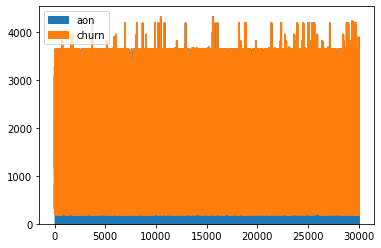

In [83]:
# aon vs churn

churn_678[['aon','churn']].plot.area()
# we hardly see any pattern here as the dataset is highly imbalanced

In [70]:
# creating a new category for 'arpu' based on revenue

low_rev = churn_678.avg_arpu_678.quantile([.4]).item()
med_rev = churn_678.avg_arpu_678.quantile([.8]).item()
high_rev = churn_678.avg_arpu_678.quantile([.95]).item()

def get_arpu_category(x):
    if x < low_rev:
        return 'low_revenue'
    elif x < med_rev:
        return 'medium_revenue'
    elif x < high_rev:
        return 'high_revenue'
    else:
        return 'Highest_revenue'

In [71]:
churn_678['avg_arpu_678_cat'] = churn_678['avg_arpu_678'].apply(lambda x: get_arpu_category(x))
churn_678.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,avg_arpu_678,avg_total_rech_amt_678,avg_total_calls_678,avg_total_internet_678,avg_arpu_678_cat
0,7000701601,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,1863.503333,2002.666667,510.028333,0.000000,Highest_revenue
1,7001524846,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0,336.102000,386.000000,210.078333,186.486667,low_revenue
2,7002191713,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.

In [72]:
# creating dummy variables for the dataframe

dummy_cols = pd.get_dummies(churn_678['avg_arpu_678_cat'],drop_first=True).columns
churn_678[dummy_cols] = pd.get_dummies(churn_678['avg_arpu_678_cat'],drop_first=True)
churn_678

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,avg_arpu_678,avg_total_rech_amt_678,avg_total_calls_678,avg_total_internet_678,avg_arpu_678_cat,high_revenue,low_revenue,medium_revenue
0,7000701601,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,1863.503333,2002.666667,510.028333,0.000000,Highest_revenue,0,0,0
1,7001524846,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0,336.102000,386.000000,210.078333,186.486667,low_revenue,0,1,0
2,7002191713,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,492.846,205.671,593.260,501.76,108.39,534.24,41

In [73]:
# churn_678[]
list(dummy_cols)

['high_revenue', 'low_revenue', 'medium_revenue']

<AxesSubplot:>

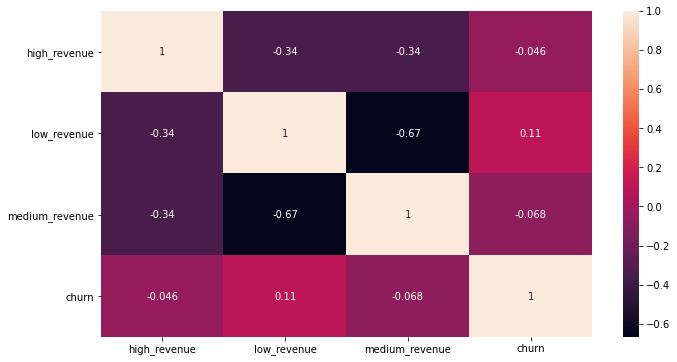

In [74]:
# creating heatmap to find correlation b/w dummy columns

plt.figure(figsize=[11,6])
all_call_corr = churn_678[list(dummy_cols)+['churn']].corr()
sns.heatmap(all_call_corr,annot=True)

### for low revenue customer it is 11%, low revenve customer are highly prone to churn.

#### Outliers validation 

<AxesSubplot:xlabel='avg_arpu_678'>

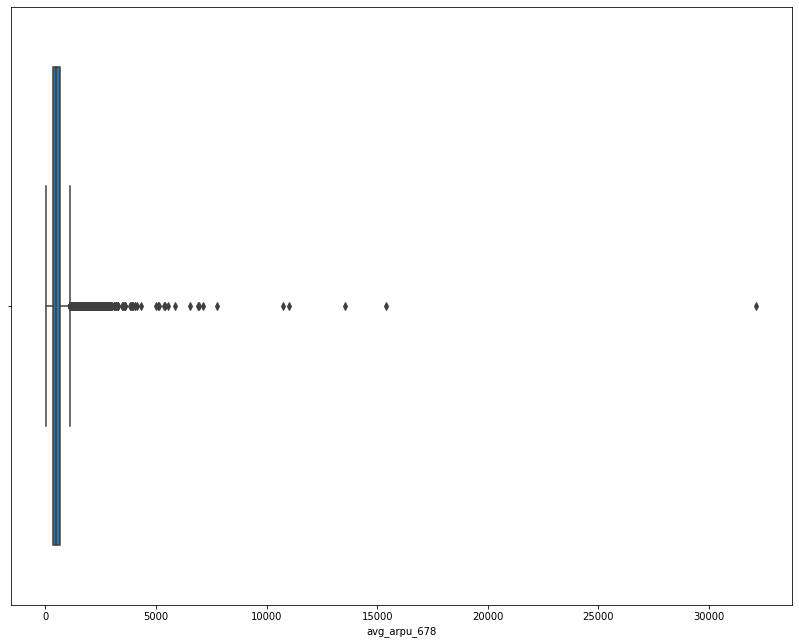

In [75]:
# plotting boxplot for arpu_678

plt.figure(figsize = (14, 11))
sns.boxplot(churn_678.avg_arpu_678)

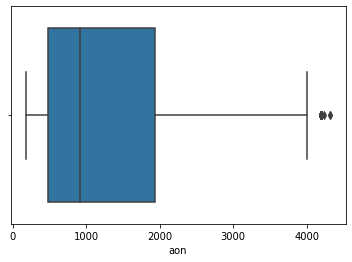

In [76]:
# plotting boxplot for aon

sns.boxplot(churn_678.aon)
plt.show()

<AxesSubplot:xlabel='churn', ylabel='tenure_in_years'>

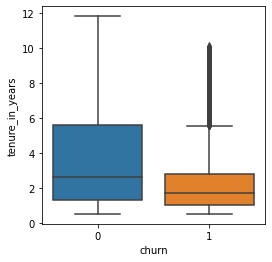

In [77]:
# churn vs tenure_in_years 
fig= plt.figure(figsize = (4,4))
churn_678['tenure_in_years'] = np.round(churn_678['aon']/365, 1)
sns.boxplot(x = churn_678.churn, y = churn_678.tenure_in_years)

**Observation: From the above box plot, we observe customers who are associated with the operator for longer time, do not churn. In otherwords, customer who churn out, have less number of tenure with the operator**

### Train Test and Split

In [86]:
date_cols_678 = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                   'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
churn_678[date_cols_678].astype(np.int64)


# churn_678
no_date_cols = [x for x in churn_678.columns if x not in date_cols_678]

In [87]:
# creating dataframe without any date columns

churn_678 = churn_678[no_date_cols]

In [88]:
churn_678.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30034 entries, 0 to 30033
Data columns (total 145 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   mobile_number           int64  
 1   circle_id               int64  
 2   loc_og_t2o_mou          float64
 3   std_og_t2o_mou          float64
 4   loc_ic_t2o_mou          float64
 5   arpu_6                  float64
 6   arpu_7                  float64
 7   arpu_8                  float64
 8   onnet_mou_6             float64
 9   onnet_mou_7             float64
 10  onnet_mou_8             float64
 11  offnet_mou_6            float64
 12  offnet_mou_7            float64
 13  offnet_mou_8            float64
 14  roam_ic_mou_6           float64
 15  roam_ic_mou_7           float64
 16  roam_ic_mou_8           float64
 17  roam_og_mou_6           float64
 18  roam_og_mou_7           float64
 19  roam_og_mou_8           float64
 20  loc_og_t2t_mou_6        float64
 21  loc_og_t2t_mou_7        float64
 2

In [89]:
# importing necessary libraries for train- test split

from sklearn.model_selection import train_test_split

In [90]:
# Putting feature variable to X
X = churn_678.drop(['churn','circle_id','mobile_number','avg_arpu_678_cat'],axis=1)

# Putting response variable to y
y = churn_678['churn']

X

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_arpu_678,avg_total_rech_amt_678,avg_total_calls_678,avg_total_internet_678,high_revenue,low_revenue,medium_revenue,tenure_in_years
0,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1863.503333,2002.666667,510.028333,0.000000,0,0,0,2.2
1,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,336.102000,386.000000,210.078333,186.486667,0,1,0,0.9
2,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,30

In [91]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [92]:
X_test

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_arpu_678,avg_total_rech_amt_678,avg_total_calls_678,avg_total_internet_678,high_revenue,low_revenue,medium_revenue,tenure_in_years
9786,0.0,0.0,0.0,408.740,655.090,265.486,0.000000,0.000000,5.660000,1.130000,4.560000,1.160000,6.880000,0.000000,20.510000,1.130000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,4.56000,1.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.560000,1.080000,0.000000,0.000000,5.660000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,5.660000,0.0000,0.160000,0.000000,0.750000,0.000000,0.0000,0.000000,0.0000,0.000000,0.75,4.73,6.74,0.000000,0.860000,0.00000,6.310000,17.290000,1.110000,0.000000,19.600000,0.300000,6.310000,37.760000,1.410000,0.980000,0.210000,2.790000,0.350000,0.460000,0.000000,0.710000,4.880000,5.850000,0.0,0.0,0.0,2.040000,5.560000,8.640000,9.08,44.38,11.18,0.230000,0.740000,0.000000,0.000000,0.000000,0.000000,0.48000,0.29000,1.110000,4,5,4,654,654,452,252,252,252,252,252,0,0.00,0.00,0.00,1152.05,1719.51,1216.55,0,0,0,1,0,0,1,2,1,1,0,0,226,0.00,0.00,0.00,443.105333,586.666667,12.810000,681.351667,0,0,1,0.6
1655,0.0,0.0,0.0,339.533,735.087,587.131,188.630000,449.590000,509.560000,101.340000,340.110000,132.790000,11.660000,77.960000,25.180000,43.010000,245.930000,45.260000,102.980000,178.140000,146.780000,43.590000,84.78000,61.110000,0.000000,0.000000,0.000000,0.000000,6.900000,0.000000,146.580000,262.930000,207.890000,51.360000,143.310000,344.940000,49.53000,131.010000,44.790000,0.00000,0.000000,0.000000,0.0,0.0,0.0,100.890000,274.330000,389.740000,0.0000,0.000000,0.000000,0.740000,10.160000,2.0900,0.000000,0.0000,0.000000,248.23,547.43,599.74,105.930000,201.680000,145.94000,47.330000,95.780000,91.560000,0.000000,0.000000,0.000000,153.260000,297.460000,237.510000,2.060000,49.480000,0.990000,3.730000,21.290000,29.110000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.790000,70.780000,30.110000,159.06,368.24,267.63,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,9,16,11,423,831,686,110,70,130,50,65,0,0.00,0.00,0

#### Data Imbalance Treatment using SMOTE

In [93]:
# existing data imbalance 
y_train.mean() * 100

8.704751938353231

In [94]:
# Importing the SMOTE
from imblearn.over_sampling import SMOTE

In [95]:
# BALANCING

oversampler_sm = SMOTE(random_state=0)
X_train,y_train = oversampler_sm.fit_sample(X_train,y_train)

In [96]:
# after applying SMOTE technique to balance out the data
y_train.mean()

0.5

## Step 5. Data Modelling

### Data Modeling with PCA

In [1020]:
#Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA( random_state=100)

In [1021]:
#Doing the PCA on the train data

pca.fit(X_train)

PCA(random_state=100)

In [1022]:
# check for the components

pca.components_

array([[ 5.11088705e-19,  1.11022302e-16,  2.22044605e-16, ...,
        -1.25567195e-04,  1.73225053e-05, -2.16815595e-04],
       [-2.27015749e-19, -1.11022302e-16,  8.32667268e-17, ...,
        -1.15385480e-04,  2.20098878e-05,  4.03856185e-04],
       [ 7.81588267e-20, -9.02056208e-17, -2.08166817e-17, ...,
         5.02863623e-05, -3.83309848e-05, -1.22208631e-03],
       ...,
       [ 0.00000000e+00, -2.16742638e-03,  5.61948838e-03, ...,
         1.42398097e-16,  5.62633165e-16,  1.37554884e-15],
       [ 9.99999723e-01,  6.78306769e-05, -7.21480239e-04, ...,
        -3.02455560e-16, -2.40110335e-15, -4.42123576e-14],
       [ 0.00000000e+00, -9.83022913e-01, -1.17543130e-01, ...,
         1.22720844e-15,  7.15248173e-16,  1.01370301e-13]])

In [1023]:
pca.explained_variance_ratio_

array([2.49590162e-01, 1.60311153e-01, 1.03756095e-01, 8.09435675e-02,
       7.03829978e-02, 5.80155948e-02, 4.96889584e-02, 3.39697486e-02,
       2.26729187e-02, 2.19010806e-02, 1.53027851e-02, 1.48986228e-02,
       1.23282969e-02, 1.18620165e-02, 9.92780252e-03, 9.36300568e-03,
       8.24333742e-03, 6.72136746e-03, 5.89160913e-03, 5.28511367e-03,
       4.61493750e-03, 4.16329012e-03, 3.86631304e-03, 3.62180727e-03,
       2.73586123e-03, 2.70464224e-03, 2.44784517e-03, 2.15410146e-03,
       1.99098468e-03, 1.82027873e-03, 1.67354213e-03, 1.39706918e-03,
       1.34867761e-03, 1.17223831e-03, 1.06352679e-03, 1.02254795e-03,
       9.11863736e-04, 8.32388840e-04, 8.00595490e-04, 7.47677841e-04,
       7.42746554e-04, 6.92759146e-04, 6.40974491e-04, 5.70890798e-04,
       5.44910773e-04, 5.28335546e-04, 4.91247947e-04, 4.37774709e-04,
       4.13221473e-04, 3.54288417e-04, 3.46083293e-04, 3.26452862e-04,
       2.06653665e-04, 1.85003006e-04, 1.67848008e-04, 1.50194179e-04,
      

In [1024]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'Feature':X.columns })
components

,PC1,PC2,PC3,Feature
0,5.110887e-19,-2.270157e-19,7.815883e-20,loc_og_t2o_mou
1,1.110223e-16,-1.110223e-16,-9.020562e-17,std_og_t2o_mou
2,2.220446e-16,8.326673e-17,-2.081668e-17,loc_ic_t2o_mou
3,1.273304e-01,1.006388e-01,4.632588e-02,arpu_6
4,1.534024e-01,1.717334e-01,-7.711612e-02,arpu_7
5,1.164756e-01,2.071918e-01,-1.595635e-01,arpu_8
6,1.429272e-01,-6.912777e-02,9.988148e-02,onnet_mou_6
7,1.561614e-01,-2.573474e-02,1.024564e-03,onnet_mou_7
8,1.104329e-01,1.893538e-02,-6.531605e-02,onnet_mou_8
9,1.840070e-01,-2.831127e-02,6.234126e-02,offnet_mou_6


In [1025]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

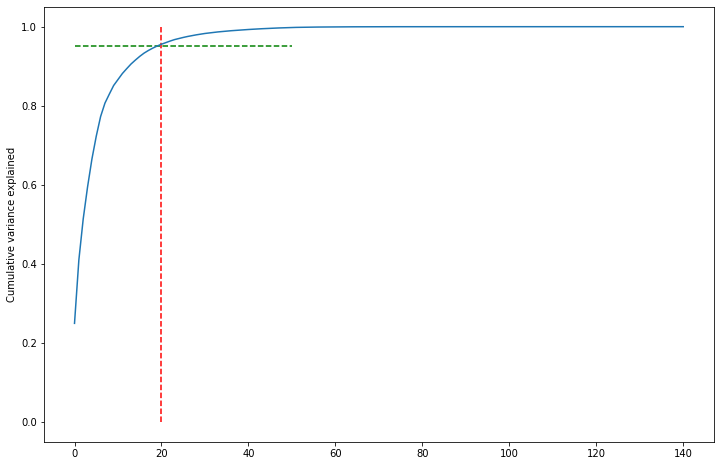

In [1026]:
# plotting map for Cumulative variance

fig = plt.figure(figsize=[12,8])
plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

around 95% varianceis explained with 20 variables

In [1028]:
#importing libraries for IncrementalPCA

from sklearn.decomposition import IncrementalPCA

In [1029]:
pca_final = IncrementalPCA(n_components=16)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(38386, 16)

In [1030]:
# finding the transpose

corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(16, 16)

<AxesSubplot:>

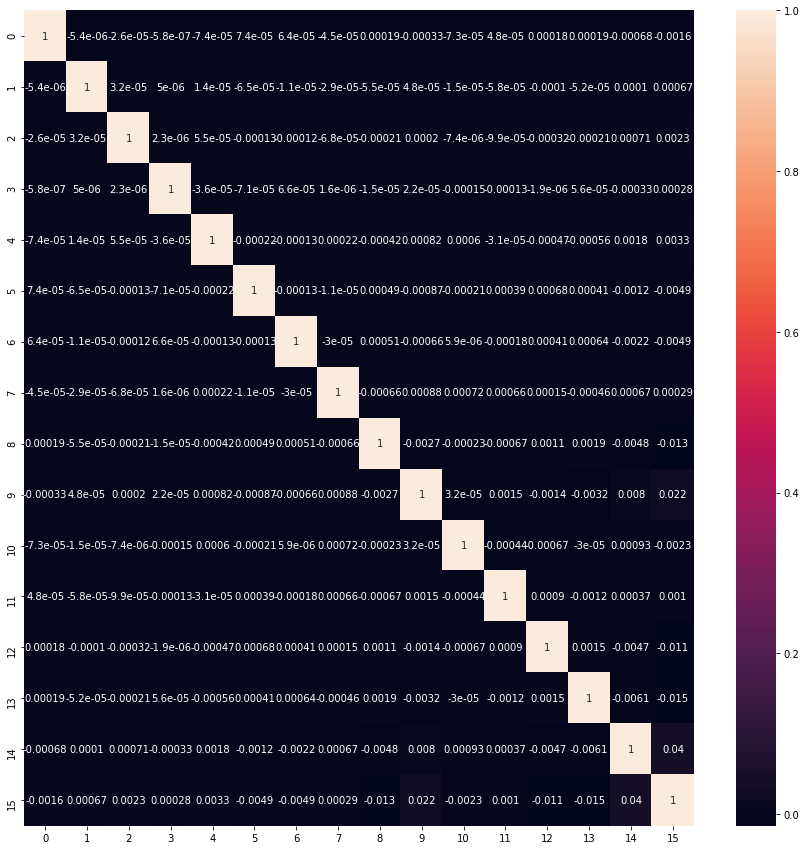

In [1031]:
# plotting heatmap

plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [1032]:
# transforming the test set

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9011, 16)

## Model 1: LogesticRegression

In [1033]:
# importing libraries for LogisticRegression

from sklearn.linear_model import LogisticRegression

In [1034]:
# fitting the model for train-set

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)

In [1035]:
# predicting the y_train variable based for train-set

y_train_pred = model_pca.predict_proba(df_train_pca)

In [1036]:
y_test_pred = model_pca.predict_proba(df_test_pca)

In [1037]:
y_pred.shape

(9011, 2)

In [1038]:
# finding the ROC score for the y_test value

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,confusion_matrix
"{:2.2}".format(roc_auc_score(y_test, y_pred[:,1]))

'0.85'

In [1039]:
# plotting the ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1040]:
# predicting the y_train_final variable

y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'Churn_Prob':y_train_pred[:,1]})

In [1041]:
y_train_pred_final

,churn,Churn_Prob
0,0,0.292809
1,0,0.468935
2,0,0.037453
3,0,0.017322
4,0,0.378306
...,...,...
38381,1,0.795722
38382,1,0.791297
38383,1,0.571100
38384,1,0.406598


In [1042]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [1043]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()




,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.292809,1,1,1,0,0,0,0,0,0,0
1,0,0.468935,1,1,1,1,1,0,0,0,0,0
2,0,0.037453,1,0,0,0,0,0,0,0,0,0
3,0,0.017322,1,0,0,0,0,0,0,0,0,0
4,0,0.378306,1,1,1,1,0,0,0,0,0,0


In [1044]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.644115  0.972959  0.315271
0.2   0.2  0.712994  0.950607  0.475382
0.3   0.3  0.759912  0.919293  0.600531
0.4   0.4  0.792659  0.880842  0.704476
0.5   0.5  0.813969  0.835826  0.792112
0.6   0.6  0.814802  0.768457  0.861147
0.7   0.7  0.796983  0.682488  0.911478
0.8   0.8  0.713880  0.477987  0.949773
0.9   0.9  0.567785  0.151149  0.984421


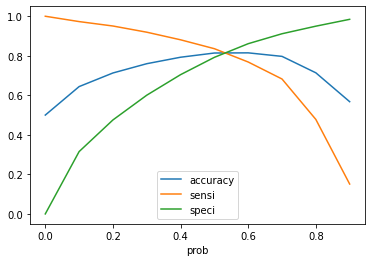

In [1045]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1046]:
# creating lambda for churn probablity along with prob-prediction 

y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.292809,1,1,1,0,0,0,0,0,0,0,0
1,0,0.468935,1,1,1,1,1,0,0,0,0,0,0
2,0,0.037453,1,0,0,0,0,0,0,0,0,0,0
3,0,0.017322,1,0,0,0,0,0,0,0,0,0,0
4,0,0.378306,1,1,1,1,0,0,0,0,0,0,0


In [1047]:
# Let's check the overall accuracy

accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.816182983379357

In [1048]:
# creating confusion matrix

confusion2 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[15912,  3281],
       [ 3775, 15418]], dtype=int64)

In [1049]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1050]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.803313708122753

In [1051]:
y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'Churn_Prob':y_test_pred[:,1]})

In [1052]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_final.head()


,churn,Churn_Prob,final_predicted
0,0,0.696294,1
1,0,0.309527,1
2,0,0.099819,0
3,0,0.290059,1
4,0,0.119774,1


In [1053]:
# creating confusion matrix for y_test 

confusion2 = confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1054]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.9546568627450981

In [1055]:
rmse = np.sqrt(mean_squared_error(y_test_pred_final.churn, y_test_pred_final.final_predicted)).round(2)
print('rmse ',rmse)

print('R2 score: %.2f' % r2_score(y_test_pred_final.churn, y_test_pred_final.final_predicted))

rmse  0.79
R2 score: -6.60


### XGBoost Classifier

In [ ]:
# importing libraries

import xgboost as xgb
from sklearn import metrics

In [1056]:
xgclf = xgb.XGBClassifier()
xgclf.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1058]:
metrics.roc_auc_score(y_true=y_train,y_score=xgclf.predict_proba(df_train_pca)[:, 1])

0.9899178966597364

In [1059]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(df_test_pca)[:, 1]))

AUC on test data by XGBoost = 0.8551315065379417


In [1060]:
# predicting the train dataset

y_train_pred = xgclf.predict_proba(df_train_pca)

In [1061]:
# predicting the test dataset

y_test_pred = xgclf.predict_proba(df_test_pca)

In [1062]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'Churn_Prob':y_train_pred[:,1]})
fpr, tpr, thresholds = roc_curve( y_train_pred_final.churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [1063]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.146934,1,1,0,0,0,0,0,0,0,0
1,0,0.251905,1,1,1,0,0,0,0,0,0,0
2,0,0.010997,1,0,0,0,0,0,0,0,0,0
3,0,0.003361,1,0,0,0,0,0,0,0,0,0
4,0,0.246571,1,1,1,0,0,0,0,0,0,0


In [1064]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.845334  0.999635  0.691033
0.2   0.2  0.905617  0.997343  0.813890
0.3   0.3  0.933153  0.992497  0.873808
0.4   0.4  0.947976  0.984213  0.911739
0.5   0.5  0.952561  0.968218  0.936904
0.6   0.6  0.950607  0.945345  0.955869
0.7   0.7  0.938702  0.906581  0.970823
0.8   0.8  0.908274  0.833481  0.983067
0.9   0.9  0.817824  0.640494  0.995154


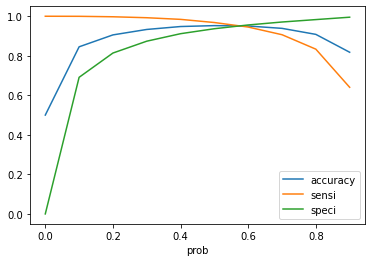

In [1065]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1067]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.146934,1,1,0,0,0,0,0,0,0,0,0
1,0,0.251905,1,1,1,0,0,0,0,0,0,0,0
2,0,0.010997,1,0,0,0,0,0,0,0,0,0,0
3,0,0.003361,1,0,0,0,0,0,0,0,0,0,0
4,0,0.246571,1,1,1,0,0,0,0,0,0,0,0


In [1068]:
# creating confusion matrix

confusion2 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[18171,  1022],
       [  794, 18399]], dtype=int64)

In [1069]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1070]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.9586307507945605

In [1071]:
y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'Churn_Prob':y_test_pred[:,1]})

In [1072]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_final.head()


,churn,Churn_Prob,final_predicted
0,0,0.142136,1
1,0,0.078840,0
2,0,0.033507,0
3,0,0.068583,0
4,0,0.002535,0


In [1073]:
# creating confusion matrix

confusion2 = confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1074]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8737745098039216

In [1075]:
# calculating the RMSE and R2 score

rmse = np.sqrt(mean_squared_error(y_test_pred_final.churn, y_test_pred_final.final_predicted)).round(2)
print('rmse ',rmse)
print('R2 score: %.2f' % r2_score(y_test_pred_final.churn, y_test_pred_final.final_predicted))

rmse  0.58
R2 score: -3.12


### HyperParameter Tunning

In [ ]:
# importing libraries

from sklearn import model_selection
xgb_model = xgb.XGBClassifier()

In [1076]:
# Default-Run of default-hyperparameters

parameters = {'learning_rate': [0.1, 0.3],
              'max_depth': [4, 6],
              'min_child_weight': [3, 7, 11],
              'n_estimators': [ 100, 150]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True,
                                      verbose=True)

clf_xgb.fit(df_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  5.3min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [1077]:
# printing the values

print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 150}
0.9642509167186178
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [1078]:
clf_xgb_best = clf_xgb.best_estimator_

In [1079]:
# predicting the train data

y_train_pred = clf_xgb_best.predict_proba(df_train_pca)

In [1080]:
# predicting the test data

y_test_pred = clf_xgb_best.predict_proba(df_test_pca)

In [1081]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'Churn_Prob':y_train_pred[:,1]})

fpr, tpr, thresholds = roc_curve( y_train_pred_final.churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [1082]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.095401,1,0,0,0,0,0,0,0,0,0
1,0,0.191687,1,1,0,0,0,0,0,0,0,0
2,0,0.013981,1,0,0,0,0,0,0,0,0,0
3,0,0.000367,1,0,0,0,0,0,0,0,0,0
4,0,0.129295,1,1,0,0,0,0,0,0,0,0


In [1083]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.867738  1.000000  0.735476
0.2   0.2  0.923019  0.998333  0.847705
0.3   0.3  0.950008  0.995623  0.904392
0.4   0.4  0.963424  0.990153  0.936696
0.5   0.5  0.969572  0.981660  0.957484
0.6   0.6  0.968478  0.964466  0.972490
0.7   0.7  0.958709  0.933882  0.983536
0.8   0.8  0.932580  0.872610  0.992549
0.9   0.9  0.853671  0.708852  0.998489


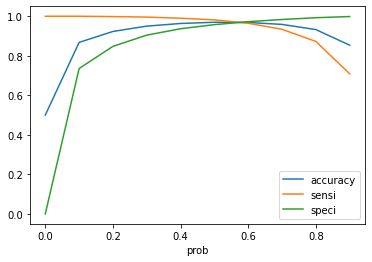

In [1084]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1085]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.56 else 0)

y_train_pred_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.095401,1,0,0,0,0,0,0,0,0,0,0
1,0,0.191687,1,1,0,0,0,0,0,0,0,0,0
2,0,0.013981,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000367,1,0,0,0,0,0,0,0,0,0,0
4,0,0.129295,1,1,0,0,0,0,0,0,0,0,0


In [1086]:
# creating confusion matrix

confusion2 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[18553,   640],
       [  535, 18658]], dtype=int64)

In [1087]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1088]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.9721252539988537

In [1089]:
y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'Churn_Prob':y_test_pred[:,1]})

In [1090]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_final.head()


,churn,Churn_Prob,final_predicted
0,0,0.187969,1
1,0,0.124708,1
2,0,0.022197,0
3,0,0.030032,0
4,0,0.001651,0


In [1091]:
# creating confusion matrix

confusion2 = confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1092]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8370098039215687

In [1093]:
# fetching the RMSE and R2 score

rmse = np.sqrt(mean_squared_error(y_test_pred_final.churn, y_test_pred_final.final_predicted)).round(2)
print('rmse ',rmse)

print('R2 score: %.2f' % r2_score(y_test_pred_final.churn, y_test_pred_final.final_predicted))

rmse  0.56
R2 score: -2.78


### Decision Tree Classifier

In [1094]:
# importing the libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [1095]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [1097]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [3, 5,9],
    'min_samples_leaf': [50,80, 100],
    'max_features': [6,8,9,10,12],
    'n_estimators': [10, 30, 50, 100]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")



In [1098]:
%%time
grid_search.fit(df_train_pca,y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 17.8min finished


Wall time: 18min 4s


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 9],
                         'max_features': [6, 8, 9, 10, 12],
                         'min_samples_leaf': [50, 80, 100],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='accuracy', verbose=1)

In [1099]:
# fetching the best estimator

grid_search.best_estimator_

RandomForestClassifier(max_depth=9, max_features=10, min_samples_leaf=50,
                       n_jobs=-1, random_state=42)

In [1100]:
rf_best = grid_search.best_estimator_

In [1101]:
# predicting on the train set

y_train_pred = rf_best.predict_proba(df_train_pca)

In [1102]:
# predicting on the test set


y_test_pred = rf_best.predict_proba(df_test_pca)

In [1103]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'Churn_Prob':y_train_pred[:,1]})

fpr, tpr, thresholds = roc_curve( y_train_pred_final.churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [1104]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.217296,1,1,1,0,0,0,0,0,0,0
1,0,0.310270,1,1,1,1,0,0,0,0,0,0
2,0,0.035136,1,0,0,0,0,0,0,0,0,0
3,0,0.068158,1,0,0,0,0,0,0,0,0,0
4,0,0.316740,1,1,1,1,0,0,0,0,0,0


In [1105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.625488  0.996926  0.254051
0.2   0.2  0.767754  0.983275  0.552233
0.3   0.3  0.835982  0.948262  0.723701
0.4   0.4  0.862137  0.908717  0.815558
0.5   0.5  0.867295  0.861877  0.872714
0.6   0.6  0.854582  0.797895  0.911270
0.7   0.7  0.823113  0.701662  0.944563
0.8   0.8  0.768640  0.565310  0.971969
0.9   0.9  0.650758  0.307873  0.993644


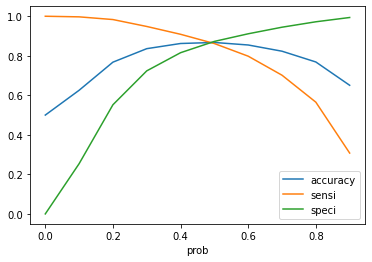

In [1106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.217296,1,1,1,0,0,0,0,0,0,0,0
1,0,0.310270,1,1,1,1,0,0,0,0,0,0,0
2,0,0.035136,1,0,0,0,0,0,0,0,0,0,0
3,0,0.068158,1,0,0,0,0,0,0,0,0,0,0
4,0,0.316740,1,1,1,1,0,0,0,0,0,0,0


In [1108]:
# creating the confusion matrix

confusion2 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[16750,  2443],
       [ 2651, 16542]], dtype=int64)

In [1109]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1110]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8618767258896473

In [1111]:
y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'Churn_Prob':y_test_pred[:,1]})

In [1112]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_final.head()


,churn,Churn_Prob,final_predicted
0,0,0.243799,1
1,0,0.212031,1
2,0,0.094267,0
3,0,0.411206,1
4,0,0.192089,1


In [1113]:
# creating the confusion matrix

confusion2 = confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9828431372549019

In [1115]:
rmse = np.sqrt(mean_squared_error(y_test_pred_final.churn, y_test_pred_final.final_predicted)).round(2)
print('rmse ',rmse)

print('R2 score: %.2f' % r2_score(y_test_pred_final.churn, y_test_pred_final.final_predicted))

rmse  0.83
R2 score: -7.34


### Model without PCA

### Scaling the Features

In [222]:
col = X_train.columns
col = col.drop(['high_revenue','low_revenue','medium_revenue','tenure_in_years'], 1)

In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = X_train.columns
X_train[col] = scaler.fit_transform(X_train[col])

X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_arpu_678,avg_total_rech_amt_678,avg_total_calls_678,avg_total_internet_678,high_revenue,low_revenue,medium_revenue,tenure_in_years
0,0.0,0.0,0.0,-0.046485,0.155577,0.293099,1.291242,1.349320,1.551647,-0.058793,0.125679,0.220621,-0.230098,-0.184943,-0.222775,-0.272069,-0.197715,-0.266993,-0.279563,-0.288278,-0.265551,0.007492,0.176889,0.167489,-0.258319,-0.261797,-0.244084,-0.237699,-0.159781,0.211510,-0.180151,-0.077334,-0.069492,1.550203,1.594969,1.947442,-0.016361,0.124437,0.241594,-0.159172,-0.150363,-0.15346,0.0,0.0,0.0,1.015466,1.130137,1.467437,-0.072788,-0.065018,-0.059847,0.378303,-0.332375,-0.144807,-0.353289,-0.022317,-0.018645,0.896605,1.031628,1.273100,-0.393403,-0.341201,-0.332533,0.046833,0.070889,0.191311,-0.311388,-0.306308,-0.311545,-0.185621,-0.166965,-0.065526,-0.009215,-0.032961,-0.209362,-0.260489,-0.053023,-0.085178,-0.143467,-0.146793,-0.140454,0.0,0.0,0.0,-0.195076,-0.076426,-0.191277,-0.254286,-0.177214,-0.045877,-0.460477,-0.11361,-0.255004,-0.188955,-0.168884,-0.156852,-0.090153,-0.100908,-0.097947,-0.598532,-0.476338,0.165181,0.054648,0.047173,0.243011,-0.212280,-0.172429,0.043410,0.202471,-0.347735,-0.504371,-0.258112,-0.247505,-0.200740,-0.275568,-0.272327,-0.238191,-0.245527,-0.249626,-0.229835,-0.278415,-0.270362,-0.262062,-0.25399,-0.24217,-0.223800,-0.138642,-0.134477,-0.113247,-0.286078,-0.266955,-0.293461,-0.283817,0.166724,0.141268,1.023104,-0.356870,-0.331758,-0.921335,1.572847,-0.268992
1,0.0,0.0,0.0,-0.432156,-0.403624,-0.108465,-0.369751,-0.281806,-0.417144,-0.584245,-0.426768,-0.365139,-0.230098,-0.207109,-0.222775,-0.272069,-0.279338,-0.266993,0.350306,0.510672,-0.067149,-0.106248,-0.033392,0.021153,0.531228,0.153769,1.130684,-0.237699,5.490220,0.149534,0.173120,0.301783,0.034909,-0.523022,-0.501864,-0.402301,-0.534371,-0.496681,-0.427136,-0.159172,-0.150363,-0.15346,0.0,0.0,0.0,-0.733508,-0.689628,-0.555296,-0.072788,-0.065018,-0.059847,-0.349159,3.383330,0.266208,-0.353289,-0.022317,-0.018645,-0.619653,-0.395904,-0.361848,0.104276,0.032802,0.013187,-0.141659,-0.138389,-0.190151,-0.307881,

In [224]:
# Importing necessary libraries

import statsmodels.api as sm

In [225]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)          
rfe = rfe.fit(X_train[col], y_train)

In [226]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 127),
 ('std_og_t2o_mou', False, 126),
 ('loc_ic_t2o_mou', False, 125),
 ('arpu_6', False, 23),
 ('arpu_7', False, 118),
 ('arpu_8', False, 74),
 ('onnet_mou_6', False, 31),
 ('onnet_mou_7', False, 76),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 32),
 ('offnet_mou_7', False, 107),
 ('offnet_mou_8', False, 8),
 ('roam_ic_mou_6', False, 59),
 ('roam_ic_mou_7', False, 26),
 ('roam_ic_mou_8', False, 108),
 ('roam_og_mou_6', False, 33),
 ('roam_og_mou_7', False, 55),
 ('roam_og_mou_8', False, 9),
 ('loc_og_t2t_mou_6', False, 15),
 ('loc_og_t2t_mou_7', False, 114),
 ('loc_og_t2t_mou_8', False, 14),
 ('loc_og_t2m_mou_6', False, 94),
 ('loc_og_t2m_mou_7', False, 103),
 ('loc_og_t2m_mou_8', False, 25),
 ('loc_og_t2f_mou_6', False, 34),
 ('loc_og_t2f_mou_7', False, 35),
 ('loc_og_t2f_mou_8', False, 75),
 ('loc_og_t2c_mou_6', False, 81),
 ('loc_og_t2c_mou_7', False, 80),
 ('loc_og_t2c_mou_8', False, 85),
 ('loc_og_mou_6', False, 30),
 ('loc_og_mou_7', False, 68

In [227]:
col = X_train.columns[rfe.support_]

In [228]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'avg_arpu_678', 'avg_total_rech_amt_678',
       'avg_total_calls_678', 'avg_total_internet_678'],
      dtype='object', length=126)

In [229]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38386
Model:                            GLM   Df Residuals:                    38370
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12364.
Date:                Mon, 12 Oct 2020   Deviance:                       24728.
Time:                        22:41:30   Pearson chi2:                 2.00e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0426      0.025     -1.680      0.093      -0.092       0.007
onnet_mou_8          1.3289      0.067     19.757      0.000       1.197       1.461
std_og_t2m_mou_8     1.1611      0.060     19.228      0.000       1.043       1.279
total_og_mou_8      -2.7646      0.104    -26.679      0.000      -2.968      -2.561
loc_ic_mou_8         2.7739      0.143     19.391      0.000       2.494       3.054
std_ic_mou_8         1.3478      0.069     19.626      0.000       1.213       1.482
total_ic_mou_8      -4.6470      0.183    -25.439      0.000      -5.005      -4.289
isd_ic_mou_8         0.8527      0.044     19.236      0.000       0.766       0.940
total_rech_num_8    -0.6021      0.024    -25.442      0.000      -0.648      -0.556
monthly_2g_8        -0.8116      0.040    -20.224      0.000      -0.890      -0.733
monthly_3g_8        -1.3203      0.043    -30.820      0.000      -1.404      -1.236
aon                -11.1408      1.454     -7.662      0.000     -13.991      -8.291
high_revenue        -1.1070      0.028    -38.884      0.000      -1.163      -1.051
low_revenue         -2.2139      0.043    -51.506      0.000      -2.298      -2.130
medium_revenue      -1.8965      0.037    -50.789      0.000      -1.970      -1.823
tenure_in_years     10.7227      1.454      7.376      0.000       7.874      13.572
====================================================================================
"""

In [230]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [231]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,aon,8380.89
14,tenure_in_years,8380.34
5,total_ic_mou_8,26.03
3,loc_ic_mou_8,16.32
2,total_og_mou_8,11.36
0,onnet_mou_8,5.38
1,std_og_t2m_mou_8,4.55
4,std_ic_mou_8,4.18
12,low_revenue,2.29
13,medium_revenue,2.12


In [232]:
col = col.drop('aon', 1)
col

Index(['onnet_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8',
       'monthly_2g_8', 'monthly_3g_8', 'high_revenue', 'low_revenue',
       'medium_revenue', 'tenure_in_years'],
      dtype='object')

In [233]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38386
Model:                            GLM   Df Residuals:                    38371
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12393.
Date:                Mon, 12 Oct 2020   Deviance:                       24787.
Time:                        22:42:41   Pearson chi2:                 2.06e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0395      0.025     -1.557      0.119      -0.089       0.010
onnet_mou_8          1.3304      0.067     19.802      0.000       1.199       1.462
std_og_t2m_mou_8     1.1605      0.060     19.247      0.000       1.042       1.279
total_og_mou_8      -2.7652      0.104    -26.717      0.000      -2.968      -2.562
loc_ic_mou_8         2.7985      0.143     19.518      0.000       2.517       3.080
std_ic_mou_8         1.3531      0.069     19.665      0.000       1.218       1.488
total_ic_mou_8      -4.6692      0.183    -25.512      0.000      -5.028      -4.311
isd_ic_mou_8         0.8607      0.044     19.491      0.000       0.774       0.947
total_rech_num_8    -0.5990      0.024    -25.388      0.000      -0.645      -0.553
monthly_2g_8        -0.8122      0.040    -20.256      0.000      -0.891      -0.734
monthly_3g_8        -1.3212      0.043    -30.821      0.000      -1.405      -1.237
high_revenue        -1.1012      0.028    -38.824      0.000      -1.157      -1.046
low_revenue         -2.2063      0.043    -51.567      0.000      -2.290      -2.122
medium_revenue      -1.8888      0.037    -50.831      0.000      -1.962      -1.816
tenure_in_years     -0.4159      0.018    -22.713      0.000      -0.452      -0.380
====================================================================================
"""

In [234]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_ic_mou_8,26.03
3,loc_ic_mou_8,16.31
2,total_og_mou_8,11.36
0,onnet_mou_8,5.38
1,std_og_t2m_mou_8,4.55
4,std_ic_mou_8,4.18
11,low_revenue,2.29
12,medium_revenue,2.12
6,isd_ic_mou_8,1.99
10,high_revenue,1.59


In [235]:
col = col.drop('total_ic_mou_8', 1)
col

Index(['onnet_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_mou_8',
       'std_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8', 'monthly_2g_8',
       'monthly_3g_8', 'high_revenue', 'low_revenue', 'medium_revenue',
       'tenure_in_years'],
      dtype='object')

In [236]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38386
Model:                            GLM   Df Residuals:                    38372
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 12 Oct 2020   Deviance:                          nan
Time:                        22:42:44   Pearson chi2:                 3.05e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2817      0.021    -13.440      0.000      -0.323      -0.241
onnet_mou_8          2.7046      0.059     45.985      0.000       2.589       2.820
std_og_t2m_mou_8     2.3813      0.052     45.386      0.000       2.278       2.484
total_og_mou_8      -4.9426      0.090    -55.068      0.000      -5.119      -4.767
loc_ic_mou_8        -0.5267      0.033    -15.836      0.000      -0.592      -0.462
std_ic_mou_8        -0.2598      0.026     -9.992      0.000      -0.311      -0.209
isd_ic_mou_8        -0.0471      0.021     -2.284      0.022      -0.088      -0.007
total_rech_num_8    -0.7178      0.025    -29.252      0.000      -0.766      -0.670
monthly_2g_8        -0.8577      0.041    -21.062      0.000      -0.937      -0.778
monthly_3g_8        -1.2246      0.039    -31.495      0.000      -1.301      -1.148
high_revenue        -1.1411      0.029    -39.003      0.000      -1.198      -1.084
low_revenue         -2.2817      0.044    -51.798      0.000      -2.368      -2.195
medium_revenue      -1.9764      0.038    -51.446      0.000      -2.052      -1.901
tenure_in_years     -0.4162      0.018    -23.569      0.000      -0.451      -0.382
====================================================================================
"""

In [237]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_og_mou_8,8.94
0,onnet_mou_8,4.44
1,std_og_t2m_mou_8,3.79
10,low_revenue,2.29
11,medium_revenue,2.10
9,high_revenue,1.59
6,total_rech_num_8,1.41
3,loc_ic_mou_8,1.31
12,tenure_in_years,1.11
4,std_ic_mou_8,1.05


In [238]:
col = col.drop('total_og_mou_8', 1)
col

Index(['onnet_mou_8', 'std_og_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8',
       'high_revenue', 'low_revenue', 'medium_revenue', 'tenure_in_years'],
      dtype='object')

In [239]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38386
Model:                            GLM   Df Residuals:                    38373
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15274.
Date:                Mon, 12 Oct 2020   Deviance:                       30547.
Time:                        22:42:45   Pearson chi2:                 1.03e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3260      0.019    -17.533      0.000      -0.362      -0.290
onnet_mou_8         -0.2983      0.019    -16.043      0.000      -0.335      -0.262
std_og_t2m_mou_8    -0.2921      0.019    -15.759      0.000      -0.328      -0.256
loc_ic_mou_8        -1.3027      0.030    -43.013      0.000      -1.362      -1.243
std_ic_mou_8        -0.2299      0.023     -9.828      0.000      -0.276      -0.184
isd_ic_mou_8        -0.0808      0.021     -3.890      0.000      -0.121      -0.040
total_rech_num_8    -1.1894      0.024    -49.407      0.000      -1.237      -1.142
monthly_2g_8        -0.9195      0.039    -23.490      0.000      -0.996      -0.843
monthly_3g_8        -1.1209      0.035    -32.125      0.000      -1.189      -1.053
high_revenue        -1.0460      0.025    -42.196      0.000      -1.095      -0.997
low_revenue         -1.8474      0.037    -50.332      0.000      -1.919      -1.775
medium_revenue      -1.7782      0.033    -54.602      0.000      -1.842      -1.714
tenure_in_years     -0.5534      0.016    -35.539      0.000      -0.584      -0.523
====================================================================================
"""

In [240]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,low_revenue,2.28
10,medium_revenue,2.10
8,high_revenue,1.57
5,total_rech_num_8,1.33
1,std_og_t2m_mou_8,1.19
0,onnet_mou_8,1.18
2,loc_ic_mou_8,1.13
11,tenure_in_years,1.07
3,std_ic_mou_8,1.05
7,monthly_3g_8,1.05


**VIF looks good as all the values are less than 5. Now will select these coloums for creating LogisticRegression Model**

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [242]:
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced')

In [243]:
# making prediction on test 

pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.75'

In [244]:
# making prediction on the test data

pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [245]:
# import classification_report
from sklearn.metrics import classification_report

# Import the required packages from sklearn
from sklearn.metrics import confusion_matrix, accuracy_score

In [246]:
# calculating accuracy

print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Accuracy: : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8195
           1       0.00      0.00      0.00       816

    accuracy                           0.91      9011
   macro avg       0.45      0.50      0.48      9011
weighted avg       0.83      0.91      0.87      9011

[[8195    0]
 [ 816    0]]
Accuracy: :  0.909444012873155


In [247]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [248]:
# importing libraries for ROC curve

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.7474290875593678


In [249]:
#ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

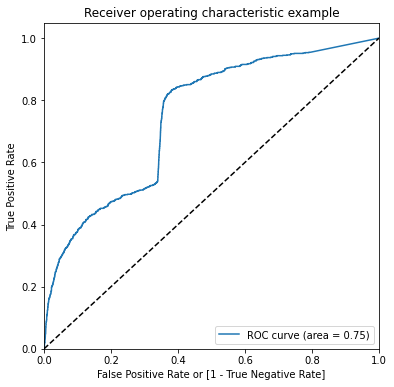

(array([0.00000000e+00, 1.22025625e-04, 2.44051251e-04, ...,
        7.95485052e-01, 7.95607077e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.95465686, 0.95465686,
        1.        ]),
 array([1.07593549e+000, 7.59354949e-002, 5.35068919e-002, ...,
        8.19855826e-309, 7.20411878e-309, 0.00000000e+000]))

In [250]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [251]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1.011754e-06,1,0,0,0,0,0,0,0,0,0
1,0,1.091892e-216,1,0,0,0,0,0,0,0,0,0
2,0,1.635550e-172,1,0,0,0,0,0,0,0,0,0
3,0,3.849465e-203,1,0,0,0,0,0,0,0,0,0
4,0,1.596105e-77,1,0,0,0,0,0,0,0,0,0


In [252]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.272334  0.204393  0.954657
0.1   0.1  0.909444  1.000000  0.000000
0.2   0.2  0.909444  1.000000  0.000000
0.3   0.3  0.909444  1.000000  0.000000
0.4   0.4  0.909444  1.000000  0.000000
0.5   0.5  0.909444  1.000000  0.000000
0.6   0.6  0.909444  1.000000  0.000000
0.7   0.7  0.909444  1.000000  0.000000
0.8   0.8  0.909444  1.000000  0.000000
0.9   0.9  0.909444  1.000000  0.000000


<AxesSubplot:xlabel='prob'>

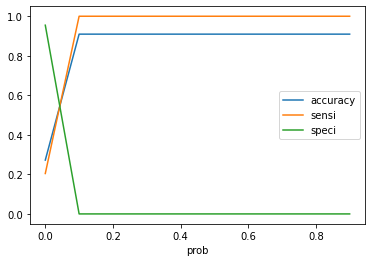

In [253]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [254]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.55 else 0

y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.001 else 0)
y_pred_final.churn.value_counts()

0    8195
1     816
Name: churn, dtype: int64

In [255]:
# Confusion matrix 

confusion_rfe = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn)
confusion_rfe

array([[8152,   43],
       [ 760,   56]], dtype=int64)

#### Matrics Values - Logistic Regression Model With RFE

In [256]:
TP = confusion_rfe[1,1] # true positive 
TN = confusion_rfe[0,0] # true negatives
FP = confusion_rfe[0,1] # false positives
FN = confusion_rfe[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_final.pred_churn))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/ Recall(Churn Correctly Detected): ', TP / float(TP+FN))

# positive predictive value 
print('Precision or positive predictive value: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.9108866940406171
Sensitivity/ Recall(Churn Correctly Detected):  0.06862745098039216
Precision or positive predictive value:  0.5656565656565656
Specificity:  0.9947528981086028
false postive rate:  0.005247101891397194
Negative predictive value:  0.914721723518851
Misclassification Rate:  0.08911330595938298


**LogisticRegression (RFE)**
Accuracy Score : 78%
Sensitivity : 6%

we can use this model as interprator model and may not be used by business as it has very low recall

In [257]:
X_train.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'jul_vbc_3g', 'jun_vbc_3g', 'avg_arpu_678', 'avg_total_rech_amt_678',
       'avg_total_calls_678', 'avg_total_internet_678', 'high_revenue',
       'low_revenue', 'medium_revenue', 'tenure_in_years'],
      dtype='object', length=141)

## Summary Model: Logistic Regression(Without PCA)

Based on our models, we find some top features to be: 
- offnet_mou_7 
- arpu_7 
- arpu_6 
- roam_ic_mou_6 
- roam_og_mou_6 
- loc_og_t2c_mou_8

Entire analysis is done on high value customers and we see very few cusomers are churning out (8.6%)

**Recommendation** 
- **loc_og_t2c_mou_8** : Focus on these customers who are more ofeten calling the T operator own call center on the 8th month. They might be facing some problem and if that don't get resolved, these customer may churn.
- Also, **Incoming and Outgoing Calls on romaing for 8th** month are strong indicators of churn behaviour.
- **Total rechargeable amount** for month 8 seems to be a strong indicator - if it dips - then it indicates a churn. 
- Focus on those customers, who are making more outgoing calls or receiving incoming calls in roaming in the 8th month. These customer have more probability of churn.
- Focus on customers making more offnet calls. There are chances that customer may churn.
- Customers with less than 3 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.

**Suggestions:**
- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
- Company must focus on the STD and ISD rates. Provide good deals to regular customers.
- Telecom company could collect customer query and complaint data and work on their services according to the needs of customers.

## Model Evaluation

Taking RMSE as the metric to evaluate the model. Below are the RMSE values figured out:
- Model 1: Logestic Regression
  - rmse  0.79
  - recall 0.9828431372549019
- Model 2: XGBoost Classifier
  - rmse 0.58
  - recall 0.8737745098039216
- Model 3: XGBoost Classifier with tuned Hyperparameter
  - rmse 0.56
  - recall 0.8370098039215687
- Model 4: Decision Tree Classifier with tuned Hyperparameter
  - rmse 0.83.
  - recall 0.9828431372549019

We have validated the data using four separate models, Four with PCA- Logistic Regression, XG Boost classifier,XG Boost classifier(with Hyperparameter tuning), Decision Tree classifier and one without PCA, Logistic Regression (using RFE). 
Based on the evaluation score we conclude that on the given dataset and given attributes, **Model 2 i.e. XGBoost Classifier** seems to be the best predictor model with a less rmse and good recall score 0.58 and 0.87 respectively. Although we can choose **Model 1 or Model 4** as well in case we are looking for higher recall value.

**END OF FILE**